Dataset download link: https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import pandas as pd
import numpy as np

## Step1 : EDA

In [2]:
# Load the data set and take a view whats inside of it.
df = pd.read_csv(r"D:\STUDY\Github ML Content\Case_Study_on_dataset\NLP project Spam and ham classification\spam.csv",encoding = 'latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Column 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' contain no important data hence we can remove this from df
And for v1,v2 we can give them a proper name for better understanding. 

In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df = df.drop(["Unnamed: 2" ,"Unnamed: 3" ,"Unnamed: 4"],axis =1)
df = df.rename(columns = {'v1':'label','v2':'text'})

Lets look what we did to your dataset

In [5]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

As we can see in the dataset df there are 4825 ham and 747 spam its imbalance dataset.
for both the classes ,some messages appear more than onces. for better understand what i m saying lets plot the chart

In [8]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

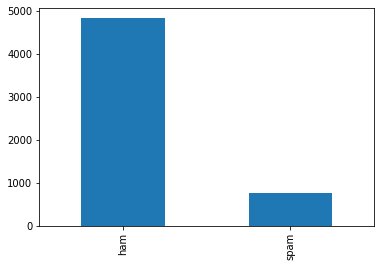

In [10]:
df.label.value_counts().plot.bar()

Target varible "label" must be in numerical for ML classification models. so, we are creating a new column as our target variable "spam" 

In [11]:
df['spam'] = df['label'].map({'spam': 1, 'ham' : 0}).astype(int)
df.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Okey! let have some feature which can help our model to increase the accuracy

In [12]:
# adding feature length of message
df['length'] = df['text'].apply(len)
df.head()

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


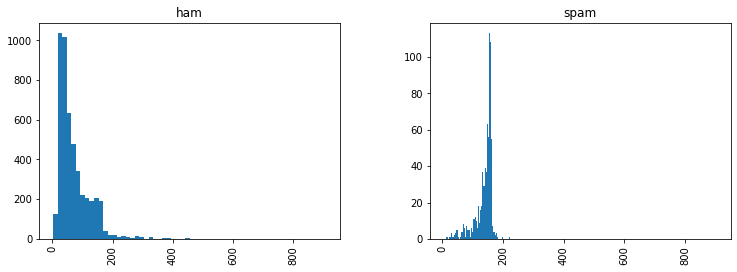

In [13]:
df.hist(column= 'length',by= 'label',bins= 60 ,figsize = (12,4))
plt.xlim(-40,950);

As we can see spam messages longer than ham messages.
lots of ham lenght below 100 and spam it is above 100.

Now , lets check the words which are more in ham and spam with Wordcloud chart

In [14]:
# creating two differnet dataset
df_ham = df[df['spam'] == 0].copy()
df_spam = df[df['spam'] == 1].copy()

In [15]:
import wordcloud
def df_spam_ham_wordcloud_chart(df_ham_spam,title):
    text = ''.join(df_ham_spam['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                        colormap='viridis', width=800, height=600).generate(text)
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

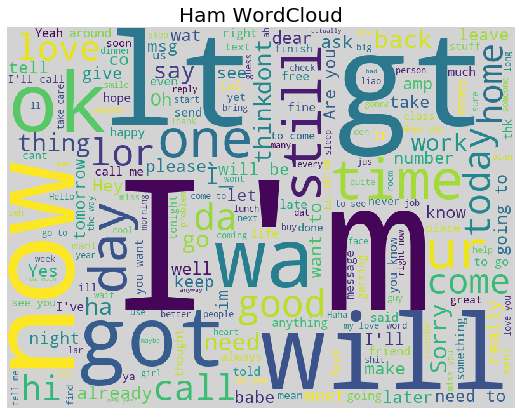

In [16]:
df_spam_ham_wordcloud_chart(df_ham,"Ham WordCloud")

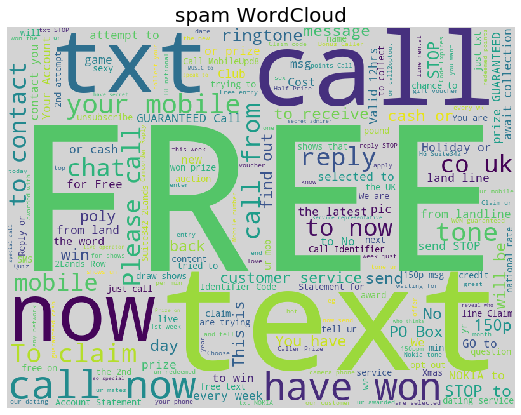

In [17]:
df_spam_ham_wordcloud_chart(df_spam,"spam WordCloud")

## Step2 : Preprocessing

Note : Basic preprocessing for common NLP task include converting text to lowercase and removing punctuation and stopwords.
    other steps for txt classification task are,
    1. Tokenization
    2. Vectorization 
    3. TF-IDF weighting

#### 2.1 Removing Punctuations and Stopwords:

In [18]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
from nltk.corpus import stopwords
stopwords.words("english")[100:110]

['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']

Stopwords are words like "and", 'the' , 'him'

above are the list of punctuation characters and stop words . To remove these from text lets create a function

In [20]:
def remove_punctuation_stopwords(msg):
    msg_remove_punc = [ch for ch in msg if ch not in string.punctuation]
    msg_remove_punc = "".join(msg_remove_punc).split()
    sms_remove_punc_remove_stopwords = [word.lower() for word in msg_remove_punc if word.lower() not in stopwords.words("english")]
    return sms_remove_punc_remove_stopwords

In [21]:
df['text'].apply(remove_punctuation_stopwords).head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

#### 2.2 Top 40 words in ham and spam messages

##### 2.2.1 Collection counter

In [22]:
from collections import Counter

In [23]:
# removing punc and stopwords from text by applying the function
# convert the column to list by tolist()
df_ham.loc[:,'text'] = df_ham['text'].apply(remove_punctuation_stopwords)
words_df_ham = df_ham['text'].tolist()
df_spam.loc[:,'text'] = df_spam['text'].apply(remove_punctuation_stopwords)
words_df_spam = df_spam['text'].tolist()

In [24]:
#Get the word from the list for ham
list_ham_words = []
for sublist in words_df_ham:
    for item in sublist:
        list_ham_words.append(item)

In [25]:
#Get the word from the list for spam
list_spam_words = []
for sublist in words_df_spam:
    for item in sublist:
        list_spam_words.append(item)

In [26]:
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)
df_hamwords_top40  = pd.DataFrame(c_ham.most_common(40),  columns=['word', 'count'])
df_spamwords_top40 = pd.DataFrame(c_spam.most_common(40), columns=['word', 'count'])

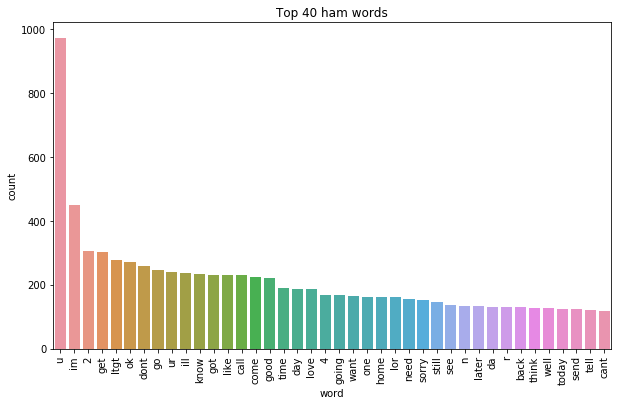

In [27]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='word',y='count',data = df_hamwords_top40,ax = ax)
plt.title("Top 40 ham words")
plt.xticks(rotation = 'vertical');

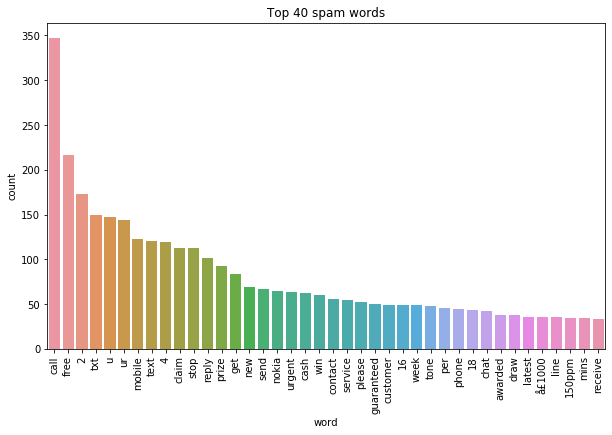

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='word',y='count',data = df_spamwords_top40,ax = ax)
plt.title("Top 40 spam words")
plt.xticks(rotation = 'vertical');

In [29]:
import nltk
fdist_ham  = nltk.FreqDist(list_ham_words)
fdist_spam = nltk.FreqDist(list_spam_words)

In [30]:
df_hamwords_top40_nltk  = pd.DataFrame(fdist_ham.most_common(40),  columns=['word', 'count'])
df_spamwords_top40_nltk = pd.DataFrame(fdist_spam.most_common(40), columns=['word', 'count'])

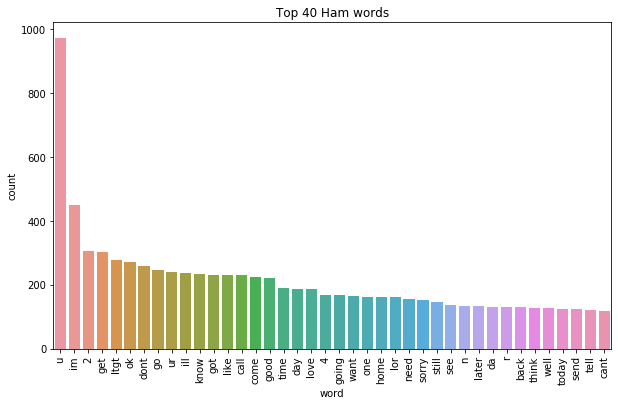

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_hamwords_top40_nltk, ax=ax)
plt.title("Top 40 Ham words")
plt.xticks(rotation='vertical');

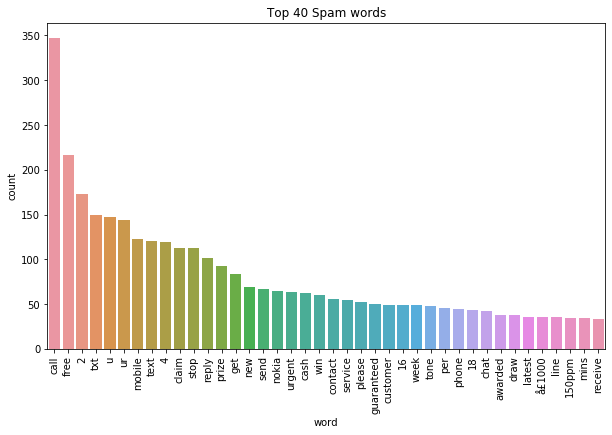

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_spamwords_top40_nltk, ax=ax)
plt.title("Top 40 Spam words")
plt.xticks(rotation='vertical');

#### 2.2 Bag of words with CountVectorizer

We can't feed sequence of symbols direclty to the algorithm .. most of algo expect numerical feature vectors with a
fixed size rather than the raw text documentswith variable length.

For this scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely.

Tokenization: tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators

Vectorization: Counting the occurances of token in each document.

TF-IDF
Normalizing and weighting with diminishing importance token that occur in the majority of sample /documents.

Bag of words
In this scheme , feature and samples are defined as follows : Each individual token occurence freq is treated as feature
the vector of all the token frequencies for a given document is considered a multivariate sample
A corpus of doc can thus be represent by matix with one row per doc and one column per token occurring in the corpus.
we call vectorization the general process of turning a collection of text documents into numerical feature vectors
his specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation.
Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

So , we apply CountVectorizer for Bag_of_Words Model also know as BOW model

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
BOW_transformer = CountVectorizer(analyzer = remove_punctuation_stopwords).fit(df['text'])

Lets check how many different words are there in the text column

In [34]:
print("Number of words",len(BOW_transformer.vocabulary_))

Number of words 9431


Example of spam and ham Messages

In [35]:
sample_spam = df['text'][8]
bow_sample_spam = BOW_transformer.transform([sample_spam])
print('This is orignal sample :',sample_spam)
print('This is transformed to bow sample :',bow_sample_spam)

This is orignal sample : WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
This is transformed to bow sample :   (0, 218)	1
  (0, 323)	1
  (0, 1906)	1
  (0, 2184)	2
  (0, 2245)	1
  (0, 2531)	1
  (0, 4194)	1
  (0, 4759)	1
  (0, 5707)	1
  (0, 6538)	1
  (0, 6775)	1
  (0, 6946)	1
  (0, 7209)	1
  (0, 8694)	1
  (0, 8698)	1
  (0, 9028)	1
  (0, 9418)	1


In [36]:
rows,cols = bow_sample_spam.nonzero()
for col in cols:
    print(BOW_transformer.get_feature_names()[col])

09061701461
12
call
claim
code
customer
hours
kl341
network
prize
receivea
reward
selected
valid
valued
winner
å£900


In [37]:
print(np.shape(bow_sample_spam))

(1, 9431)


In [38]:
sample_ham = df['text'][4]
bow_sample_ham = BOW_transformer.transform([sample_ham])
print(sample_ham)
print(bow_sample_ham)

Nah I don't think he goes to usf, he lives around here though
  (0, 1279)	1
  (0, 2882)	1
  (0, 3762)	1
  (0, 5004)	1
  (0, 5631)	1
  (0, 8224)	1
  (0, 8243)	1
  (0, 8664)	1


In [39]:
rows, cols = bow_sample_ham.nonzero()
for col in cols: 
    print(BOW_transformer.get_feature_names()[col])

around
dont
goes
lives
nah
think
though
usf


Apply bow transformation to all the msg

In [40]:
bow_data = BOW_transformer.transform(df['text'])

In [41]:
bow_data.shape

(5572, 9431)

In [42]:
bow_data.nnz

49772

Sparsity
As most documents will typically use a very small subset of the words used in the corpus,
the resulting matrix will have many feature values that are zeros (typically more than 99% of them).
For instance a collection of 10,000 short text documents (such as emails) will use a vocabulary
with a size in the order of 100,000 unique words in total while each document will use 100 to
1000 unique words individually.
In order to be able to store such a matrix in memory but also to speed up algebraic operations matrix / vector,
implementations will typically use a sparse representation such as available in the scipy.sparse package.

In [43]:
bow_data

<5572x9431 sparse matrix of type '<class 'numpy.int64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [44]:
bow_data.shape[0]

5572

In [45]:
bow_data.shape[1]

9431

In [46]:
bow_data.nnz

49772

number of none zero entries divided by matrix size

In [47]:
print( bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]) *100 )

0.09471444959776236


Around 10% of the matrix are non zeros (=ones)

#### 2.3  Term frequency inverse document frequency

Occurrence count is a good start but there is an issue: longer documents will have higher average count values
than shorter documents, even though they might talk about the same topics.
To avoid these issue:  divide the number of occurrences of each word in a document by the total number of words in the document
these new features are called tf for Term Frequencies.
Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are
therefore less informative than those that occur only in a smaller portion of the corpus.
This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.
TfidfTransformer from sklearn
Both tf and tf–idf can be computed as follows using TfidfTransformer:

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer  = TfidfTransformer().fit(bow_data)
tfidf_sample_ham = tfidf_transformer.transform(bow_sample_ham)
print(tfidf_sample_ham)

  (0, 8664)	0.4000611457714059
  (0, 8243)	0.35462891367407595
  (0, 8224)	0.2665748147939407
  (0, 5631)	0.40493594386802356
  (0, 5004)	0.44910913790937335
  (0, 3762)	0.35674330934716636
  (0, 2882)	0.23016324066220836
  (0, 1279)	0.31179198007951625


In [49]:
tfidf_sample_spam = tfidf_transformer.transform(bow_sample_spam)
print(tfidf_sample_spam)

  (0, 9418)	0.2604683359422661
  (0, 9028)	0.23445094204464131
  (0, 8698)	0.24115248419490207
  (0, 8694)	0.22254833340975305
  (0, 7209)	0.2148462495005997
  (0, 6946)	0.2564029044370425
  (0, 6775)	0.2943229069695555
  (0, 6538)	0.178899142428953
  (0, 5707)	0.2148462495005997
  (0, 4759)	0.2943229069695555
  (0, 4194)	0.22555164191980467
  (0, 2531)	0.1915015107445745
  (0, 2245)	0.21371446699888028
  (0, 2184)	0.3406301232141347
  (0, 1906)	0.1153380143353214
  (0, 323)	0.2387711073538672
  (0, 218)	0.2943229069695555


In [50]:
df_tfidf = tfidf_transformer.transform(bow_data)
print(df_tfidf)

  (0, 9107)	0.22954167967960823
  (0, 8870)	0.18978656059026508
  (0, 6376)	0.26034665364508613
  (0, 5624)	0.1806002024978732
  (0, 4803)	0.28119992157437884
  (0, 4644)	0.3328581634691494
  (0, 3845)	0.18526422487029678
  (0, 3805)	0.15637062087310696
  (0, 3748)	0.15133352947689135
  (0, 2988)	0.19730880900130401
  (0, 2463)	0.2577757346943601
  (0, 2178)	0.28119992157437884
  (0, 1840)	0.28119992157437884
  (0, 1838)	0.31774909628833775
  (0, 1375)	0.2531117123219365
  (0, 1142)	0.3328581634691494
  (1, 9003)	0.4229215011998556
  (1, 8534)	0.19658812296036549
  (1, 5972)	0.5355962344958958
  (1, 5940)	0.2688300250275592
  (1, 4842)	0.4000879300317037
  (1, 4612)	0.5131152435995512
  (2, 9059)	0.18807890505452227
  (2, 9017)	0.14698492929250848
  (2, 8518)	0.12458400696633347
  :	:
  (5568, 3767)	0.3115647413021785
  (5568, 3526)	0.48226234372873406
  (5568, 3151)	0.5533333135181996
  (5568, 1406)	0.3784412255140446
  (5569, 7919)	0.520467167163554
  (5569, 7544)	0.520467167163554
 

In [51]:
np.shape(df_tfidf)

(5572, 9431)

#### Train and test

for TFIDF matrix only 

In [52]:
from sklearn.model_selection import train_test_split
df_tfidf_train,df_tfidf_test,label_train, label_test = train_test_split(df_tfidf,df['spam'],test_size=0.3, random_state =5)

In [53]:
print(df_tfidf_train)

  (0, 302)	0.28160059853269703
  (0, 567)	0.28160059853269703
  (0, 671)	0.28160059853269703
  (0, 1942)	0.1932239644348894
  (0, 2434)	0.220255296515316
  (0, 2888)	0.28160059853269703
  (0, 3781)	0.266547625193389
  (0, 3967)	0.1630278282755275
  (0, 3987)	0.20197637406670088
  (0, 4136)	0.18344625308567056
  (0, 4166)	0.15734125051752887
  (0, 4623)	0.2597489610587937
  (0, 5089)	0.2160456861109869
  (0, 5715)	0.1490466166584497
  (0, 6304)	0.28160059853269703
  (0, 6670)	0.1913690030192696
  (0, 7070)	0.22511493508330366
  (0, 7193)	0.14425426786845122
  (0, 8923)	0.2090110300888439
  (0, 9262)	0.1807616319718383
  (1, 2995)	0.4673435369046881
  (1, 4842)	0.4543055951553843
  (1, 5758)	0.499300175899013
  (1, 5940)	0.3052603574071937
  (1, 7466)	0.4276457270739763
  :	:
  (3897, 4166)	0.13828610139782163
  (3897, 4174)	0.20290354977188252
  (3897, 4204)	0.20582280689623605
  (3897, 4766)	0.11450401264282756
  (3897, 4921)	0.1493862752363609
  (3897, 5118)	0.11789603692077022
  (389

In [54]:
print(df_tfidf_test)

  (0, 6275)	0.5795922917333785
  (0, 6545)	0.6608915057963861
  (0, 8849)	0.4767548562200867
  (1, 3748)	0.21276576357147897
  (1, 5996)	0.4679783889024282
  (1, 7003)	0.3195455380408285
  (1, 8171)	0.4316642114709841
  (1, 8281)	0.3356547486922828
  (1, 8618)	0.4679783889024282
  (1, 9049)	0.3400231348394874
  (2, 1116)	0.24201862789996945
  (2, 1415)	0.24945781119407548
  (2, 1959)	0.22873067090440397
  (2, 2460)	0.336419050177035
  (2, 3596)	0.2982142194126404
  (2, 4766)	0.19469779907234205
  (2, 4921)	0.2540101288053546
  (2, 5431)	0.2513552093548771
  (2, 5499)	0.26469395352289415
  (2, 5682)	0.21438546860430646
  (2, 5702)	0.3618124436914281
  (2, 7223)	0.207039013154666
  (2, 8407)	0.35552146555923225
  (2, 8849)	0.2072916269137645
  (3, 2511)	0.4661823010626427
  :	:
  (1668, 4858)	0.43418094593859385
  (1668, 5378)	0.43418094593859385
  (1668, 5526)	0.43418094593859385
  (1668, 7993)	0.2964679294324225
  (1668, 8356)	0.2502441553641923
  (1669, 1311)	0.3836166187401208
  (166

For TFIDF matrix and feature "length"

In [55]:
# adding lenght column with tfidf matrix
from scipy.sparse import hstack
X2 = hstack((df_tfidf,np.array(df['length'])[:,None])).A

In [56]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,df['spam'],test_size= 0.3,random_state = 5)

In [57]:
X2_train

array([[  0.,   0.,   0., ...,   0.,   0., 189.],
       [  0.,   0.,   0., ...,   0.,   0.,  41.],
       [  0.,   0.,   0., ...,   0.,   0.,  45.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 276.],
       [  0.,   0.,   0., ...,   0.,   0.,  23.],
       [  0.,   0.,   0., ...,   0.,   0.,  47.]])

In [58]:
X2_test

array([[  0.,   0.,   0., ...,   0.,   0.,  31.],
       [  0.,   0.,   0., ...,   0.,   0.,  77.],
       [  0.,   0.,   0., ...,   0.,   0., 146.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  62.],
       [  0.,   0.,   0., ...,   0.,   0.,  40.],
       [  0.,   0.,   0., ...,   0.,   0.,  68.]])

So we created two train and test dataset 1st is TFIDF matrix only and 2nd is TFIDF with length

## Steps3 : Training the model with both the dataset seprartly and analyising the result

##### Model experiment 1

#### 3.1 Naive Bayes Classification

Naive Bayes Classification model : NB classification assume that the presence of a particular feature of a 
class is unrelated to the presence of any other feature , even if it is depned on each other.

In [59]:
df_tfidf_train = df_tfidf_train.A
df_tfidf_test = df_tfidf_test.A

MultinomialNaiveBayes using tfidf matrix only

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
spam_detect_model_1 = MultinomialNB().fit(df_tfidf_train,label_train)
predict_test_MNB = spam_detect_model_1.predict(df_tfidf_test)
acc_MNB = accuracy_score(label_test,predict_test_MNB)
print(acc_MNB)

0.965311004784689


Note: Here we got the accuracy of 96% for tfidf matrix only for the test set

##### Model experiment 1A

Now Lets see what accuracy we get if we use scaling with the dataset

In [61]:
# applying scaling in train and test dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_tfidf_train_sc = scaler.fit_transform(df_tfidf_train)
df_tfidf_test_sc = scaler.fit_transform(df_tfidf_test)

In [62]:
spam_detect_model_minmax_1 = MultinomialNB().fit(df_tfidf_train_sc,label_train)
predict_test_MNB = spam_detect_model_minmax_1.predict(df_tfidf_test_sc)
acc_MNB = accuracy_score(label_test,predict_test_MNB)
print(acc_MNB)

0.9802631578947368


Nice ! we found the better result then the previous model
applying the min_max scaler on the tdidf matrix improve the performance of MNB model
It now has an accuracy of 98% for the test set

##### Model experiment 2

In this experiment MNB model with TFIDF matix with lenght ,unscaled

In [63]:
spam_detect_model_2 = MultinomialNB().fit(X2_train,y2_train)
predict_test_MNB2 = spam_detect_model_2.predict(X2_test)
acc_MNB_2 = accuracy_score(y2_test,predict_test_MNB2)
print(acc_MNB_2)

0.8761961722488039


Note: Model performance is decrease when we use TFIDF matrix with lenght 

##### Model experiment 2A

In this experiment MNB model with TFIDF matix with lenght ,scaled

Before scaling we need to transform the data in proper format

In [64]:
X2_tfidf_train = X2_train[:,0:9431]
X2_tfidf_test  = X2_test[:,0:9431]
X2_length_train = X2_train[:,9431]
X2_length_test  = X2_test[:,9431]
#apply scaling
scaler = MinMaxScaler()
X2_tfidf_train = scaler.fit_transform(X2_tfidf_train)
X2_tfidf_test  = scaler.transform(X2_tfidf_test)
scaler = MinMaxScaler()
X2_length_train = scaler.fit_transform(X2_length_train.reshape(-1, 1))
X2_length_test  = scaler.transform(X2_length_test.reshape(-1, 1))
X2_train = np.hstack((X2_tfidf_train, X2_length_train))
X2_test  = np.hstack((X2_tfidf_test,  X2_length_test))

In [65]:
spam_detect_model_3 = MultinomialNB().fit(X2_train, y2_train)
pred_test_MNB_3 = spam_detect_model_3.predict(X2_test)
acc_MNB_3 = accuracy_score(y2_test, pred_test_MNB_3)
print(acc_MNB_3)

0.9826555023923444


We studied the same classifier, Multinomial Naive Bayes, with different set of features and found that the results vary regarding the accuracy of the predictions.
In the following we study a different classifier, again with different set of features. Also we study what this accuracy actually means and also if this metric is the optimal one we should apply for this task.